# Part I: Setting Up Your Dataset

## Question 1

In [80]:
##Various imports
import pandas as pd
import math as math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

##Read titanic_data.xlsx as a dataframe
titanic_df = pd.read_excel("~/Coding/Jupyter/DSCC 240/data_mining_titanic_lab/titanic_data.xlsx")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
##Sum and percentage of passengers with no age info
print(str(titanic_df["Age"].isna().sum()) + " passengers (" + 
      str(titanic_df["Age"].isna().sum()/titanic_df["PassengerId"].count() * 100) +  
      "% of the dataset) have no age info.")

177 passengers (19.865319865319865% of the dataset) have no age info.


In [82]:
##Drop all rows with NA values under "Age"
titanic_df = titanic_df.dropna(subset = ["Age"])
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Question 2

In [152]:
##Create a new column called NotAlone
titanic_df["NotAlone"] = 1
##Fill said column with 1s unless SibSp = 0 and Parch = 0
for c in titanic_df.index:
    if(titanic_df.loc[c, "SibSp"] == 0 and titanic_df.loc[c, "Parch"] == 0):
        titanic_df.loc[c, "NotAlone"] = 0
titanic_df.head(14)

<ipython-input-152-68f9ce32d86d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["NotAlone"] = 1
/Users/jasper_lemberg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1


# Part II: Mean and Median 

## Question 3

In [84]:
##Split up the data by passenger class

##Number of first class passengers
titanic_df_passenger_class_1 = titanic_df[titanic_df["Pclass"] == 1]
len(titanic_df_passenger_class_1)
##186 passengers

186

In [85]:
##Number of second class passengers
titanic_df_passenger_class_2 = titanic_df[titanic_df["Pclass"] == 2]
len(titanic_df_passenger_class_2)
##173 passengers

173

In [86]:
##Number of third class passengers
titanic_df_passenger_class_3 = titanic_df[titanic_df["Pclass"] == 3]
len(titanic_df_passenger_class_3)
##355 passengers (largest)

355

In [87]:
##Calculate means and medians for Age and Fare columns of above datasets

##Mean age for first class
titanic_df_passenger_class_1["Age"].mean()
##38.233440860215055 (highest)

38.233440860215055

In [88]:
##Median age for first class
titanic_df_passenger_class_1["Age"].median()
##37.0 (highest)

37.0

In [89]:
##Mean fare for first class
titanic_df_passenger_class_1["Fare"].mean()
##87.96158225806447 (highest)

87.96158225806447

In [90]:
##Median fare for first class
titanic_df_passenger_class_1["Fare"].median()
##69.3 (highest)

69.3

In [91]:
##Mean age for second class
titanic_df_passenger_class_2["Age"].mean()
##29.87763005780347

29.87763005780347

In [92]:
##Median age for second class
titanic_df_passenger_class_2["Age"].median()
##29.0

29.0

In [93]:
##Mean fare for second class
titanic_df_passenger_class_2["Fare"].mean()
##21.47155606936416

21.47155606936416

In [94]:
##Median fare for second class
titanic_df_passenger_class_2["Fare"].median()
##15.0458

15.0458

In [95]:
##Mean age for third class
titanic_df_passenger_class_3["Age"].mean()
##25.14061971830986 (lowest)

25.14061971830986

In [96]:
##Median age for third class
titanic_df_passenger_class_3["Age"].median()
##24.0 (lowest)

24.0

In [97]:
##Mean fare for third class
titanic_df_passenger_class_3["Fare"].mean()
##13.229435211267623 (lowest)

13.229435211267623

In [98]:
##Median fare for third class
titanic_df_passenger_class_3["Fare"].median()
##8.05 (lowest)

8.05

## Question 4

In [99]:
##Split up the data again, but by who survived

##Number of passengers that survived
titanic_df_survived = titanic_df[titanic_df["Survived"] == 1]
len(titanic_df[titanic_df["Survived"] == 1])
##290 passengers

290

In [100]:
##Number of passengers that did not survive
titanic_df_not_survived = titanic_df[titanic_df["Survived"] == 0]
len(titanic_df[titanic_df["Survived"] == 0])
##424 passengers

424

In [101]:
##Number of first class passengers that survived
len(titanic_df_passenger_class_1[titanic_df_passenger_class_1["Survived"] == 1])
##122 passengers

122

In [102]:
##Number of first class passengers that did not survive
len(titanic_df_passenger_class_1[titanic_df_passenger_class_1["Survived"] == 0])
##64 passengers

64

In [103]:
##Number of second class passengers that survived
len(titanic_df_passenger_class_2[titanic_df_passenger_class_2["Survived"] == 1])
##83 passengers

83

In [104]:
##Number of second class passengers that did not survive
len(titanic_df_passenger_class_2[titanic_df_passenger_class_2["Survived"] == 0])
##90 passengers

90

In [105]:
##Number of third class passengers that survived
len(titanic_df_passenger_class_3[titanic_df_passenger_class_3["Survived"] == 1])
##85 passengers

85

In [106]:
##Number of third class passengers that did not survive
len(titanic_df_passenger_class_3[titanic_df_passenger_class_3["Survived"] == 0])
##270 passengers

270

# Part III: Bivariate Statistics and Variance

## Question 5

In [107]:
##Calculate a column's variance
def cal_var(col):
    numerator = 0
    for c in col:
        numerator += (c - col.mean())**2
    return (numerator/len(col))

In [108]:
##Calculate a column's standard deviation
def cal_std_dev(col):
    return math.sqrt(cal_var(col))

In [109]:
##Calculate two column's Pearson's correlation
def cal_corr(col_1, col_2):
    x_vals = 0
    y_vals = 0
    numerator = 0
    for c, c2 in zip(col_1, col_2):
        x_vals += (c - col_1.mean())**2
        y_vals += (c2 - col_2.mean())**2
        numerator += (c - col_1.mean()) * (c2 - col_2.mean())
    return (numerator/sqrt(x_vals * y_vals))

## Question 6

In [110]:
##Create new dataset with only the columns used for the correlation matrix
titanic_df_corr = titanic_df[["Survived", "Age", "SibSp", "Parch", "Fare", "NotAlone"]]
titanic_df_corr

,Survived,Age,SibSp,Parch,Fare,NotAlone
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
889,1,26.0,0,0,30.0000,0


In [111]:
##Initialize data frame with identical row names and column names. This is essentially the empty correlation matrix
titanic_df_corr_mat = pd.DataFrame(columns = ["Survived", "Age", "SibSp", "Parch", "Fare", "NotAlone"], 
                                  index = ["Survived", "Age", "SibSp", "Parch", "Fare", "NotAlone"])
##Assign values to correlation matrix
for c in titanic_df_corr_mat.index:
    for c2 in titanic_df_corr_mat.columns:
        titanic_df_corr_mat.loc[c, c2] = cal_corr(titanic_df_corr[c], titanic_df_corr[c2])
titanic_df_corr_mat

,Survived,Age,SibSp,Parch,Fare,NotAlone
Survived,1.0,-0.077221,-0.017358,0.093317,0.268189,0.19614
Age,-0.077221,1.0,-0.308247,-0.189119,0.096067,-0.19827
SibSp,-0.017358,-0.308247,1.0,0.38382,0.138329,0.629818
Parch,0.093317,-0.189119,0.38382,1.0,0.205119,0.577524
Fare,0.268189,0.096067,0.138329,0.205119,1.0,0.260136
NotAlone,0.19614,-0.19827,0.629818,0.577524,0.260136,1.0


None of the pairs of features have a strong correlation and only one pair has a medium correlation (NotAlone and SibSp). The rest of the pairs have a very weak correlation. 

## Question 7

In [112]:
##Standard deviation of Age
cal_std_dev(titanic_df["Age"])
##14.516321150817317

14.516321150817317

In [113]:
##Standard deviation of Fare
cal_std_dev(titanic_df["Fare"])
##52.881858444051744

52.881858444051744

In [114]:
##Find values for first and third quartiles
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NotAlone
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.434174
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.495995
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [115]:
##IQR for Age
38 - 20.125000
##17.875

17.875

In [116]:
##IQR for Fare
33.375000 - 8.050000
##25.325

25.325

Because both the standard deviation and the interquartile range are fairly large, the age data must be spread out. This makes sense because while the median age is 28 years old, the maximum is 80 years old and the minimum is less than 1 year old. Considering the fact that the mean age is 29.699118, whereas the mean age is 28, it is evident that most of the observations lie below the mean. This makes sense because outliers heavily influence the mean and the maximum is very far away from the rest of the data. 

# Part IV: Conditional Probabilities

## Question 8

In [117]:
##Initialize dataframes of just the females and the males on the boat
titanic_df_female = titanic_df.loc[titanic_df["Sex"] == "female"]
titanic_df_male = titanic_df.loc[titanic_df["Sex"] == "male"]

##Now adding the classes to the two dataframes (so now there are six separate dataframes)
titanic_df_female_c1 = titanic_df_female.loc[titanic_df["Pclass"] == 1]
titanic_df_female_c2 = titanic_df_female.loc[titanic_df["Pclass"] == 2]
titanic_df_female_c3 = titanic_df_female.loc[titanic_df["Pclass"] == 3]

titanic_df_male_c1 = titanic_df_male.loc[titanic_df["Pclass"] == 1]
titanic_df_male_c2 = titanic_df_male.loc[titanic_df["Pclass"] == 2]
titanic_df_male_c3 = titanic_df_male.loc[titanic_df["Pclass"] == 3]

In [118]:
##P(Survived = true | Gender = female, Class = 1)
len(titanic_df_female_c1.loc[titanic_df_female_c1["Survived"] == 1])/len(titanic_df_female_c1)

0.9647058823529412

In [119]:
##P(Survived = true | Gender = female, Class = 2)
len(titanic_df_female_c2.loc[titanic_df_female_c2["Survived"] == 1])/len(titanic_df_female_c2)

0.918918918918919

In [120]:
##P(Survived = true | Gender = female, Class = 3)
len(titanic_df_female_c3.loc[titanic_df_female_c3["Survived"] == 1])/len(titanic_df_female_c3)

0.46078431372549017

In [153]:
##P(Survived = true | Gender = male, Class = 1)
len(titanic_df_male_c1.loc[titanic_df_male_c1["Survived"] == 1])/len(titanic_df_male_c1)

0.39603960396039606

In [154]:
##P(Survived = true | Gender = male, Class = 2)
len(titanic_df_male_c2.loc[titanic_df_male_c2["Survived"] == 1])/len(titanic_df_male_c2)

0.15151515151515152

In [155]:
##P(Survived = true | Gender = male, Class = 3)
len(titanic_df_male_c3.loc[titanic_df_male_c3["Survived"] == 1])/len(titanic_df_male_c3)

0.15019762845849802

Females in first class were the most likely to survive (96.47058823529412%), whereas males in third class were least likely to survive (15.019762845849802%). 

In [124]:
##Initialize a dataframe of just the individual classes
titanic_df_c1 = titanic_df.loc[titanic_df["Pclass"] == 1]
titanic_df_c2 = titanic_df.loc[titanic_df["Pclass"] == 2]
titanic_df_c3 = titanic_df.loc[titanic_df["Pclass"] == 3]

##Now initialize another dataframe taking away anyone over the age of 10
titanic_df_c3_kids = titanic_df_c3.loc[titanic_df_c3["Age"] <= 10]

In [125]:
##P(Survived = true | Age <= 10, Class = 3)
len(titanic_df_c3_kids.loc[titanic_df_c3_kids["Survived"] == 1])/len(titanic_df_c3_kids)

0.4318181818181818

In [126]:
##Expected fare for first class
fare1 = 0
for c in titanic_df_c1["Fare"]:
    fare1 += c
fare1/len(titanic_df_c1["Fare"])

87.96158225806447

In [127]:
##Expected fare for second class
fare2 = 0
for c in titanic_df_c2["Fare"]:
    fare2 += c
fare2/len(titanic_df_c2["Fare"])

21.47155606936416

In [128]:
##Expected fare for third class
fare3 = 0
for c in titanic_df_c3["Fare"]:
    fare3 += c
fare3/len(titanic_df_c3["Fare"])

13.229435211267623

## Question 9

In [129]:
##Initialize a list of all the titles and a set of unique titles (the latter is just for convenience so I know what 
##to look up later on)
titles = []
unique_titles = set()
##Iterate through the names and split at the first comma and then again at next space after that
##Then add that string to the list
for c in titanic_df["Name"]:
    first_name = c.split(", ")[1]
    titles.append(first_name.split(". ")[0])
    unique_titles.add(first_name.split(". ")[0])
print(str(unique_titles))
##All titles listed here
len(unique_titles)

{'Rev', 'Mme', 'Major', 'Lady', 'Sir', 'the Countess', 'Master', 'Miss', 'Don', 'Jonkheer', 'Mlle', 'Dr', 'Ms', 'Mr', 'Capt', 'Mrs', 'Col'}


17

In [130]:
##Create dataframe of only Rev. titles
titanic_df_rev = titanic_df[titanic_df["Name"].str.contains("Rev. ")]
##P(Survived = true | Rev.)
len(titanic_df_rev.loc[titanic_df_rev["Survived"] == 1])/len(titanic_df_rev)

0.0

In [131]:
##Create dataframe of only Dr. titles
titanic_df_dr = titanic_df[titanic_df["Name"].str.contains("Dr. ")]
##P(Survived = true | Dr.)
len(titanic_df_dr.loc[titanic_df_dr["Survived"] == 1])/len(titanic_df_dr)

0.5

In [132]:
##Create dataframe of only Ms. titles
titanic_df_ms = titanic_df[titanic_df["Name"].str.contains("Ms. ")]
##P(Survived = true | Ms.)
len(titanic_df_ms.loc[titanic_df_ms["Survived"] == 1])/len(titanic_df_ms)

1.0

In [133]:
##Create dataframe of only Lady titles
titanic_df_lady = titanic_df[titanic_df["Name"].str.contains("Lady. ")]
##P(Survived = true | Dr.)
len(titanic_df_lady.loc[titanic_df_lady["Survived"] == 1])/len(titanic_df_lady)

1.0

In [134]:
##Create dataframe of only Jonkheer. titles
titanic_df_jonkheer = titanic_df[titanic_df["Name"].str.contains("Jonkheer. ")]
##P(Survived = true | Jonkheer.)
len(titanic_df_jonkheer.loc[titanic_df_jonkheer["Survived"] == 1])/len(titanic_df_jonkheer)

0.0

In [135]:
##Create dataframe of only Col. titles
titanic_df_col = titanic_df[titanic_df["Name"].str.contains("Col. ")]
##P(Survived = true | Col.)
len(titanic_df_col.loc[titanic_df_col["Survived"] == 1])/len(titanic_df_col)

0.5

In [136]:
##Create dataframe of only Don. titles
titanic_df_don = titanic_df[titanic_df["Name"].str.contains("Don. ")]
##P(Survived = true | Don.)
len(titanic_df_don.loc[titanic_df_don["Survived"] == 1])/len(titanic_df_don)

0.0

In [137]:
##Create dataframe of only Mlle. titles
titanic_df_mlle = titanic_df[titanic_df["Name"].str.contains("Mlle. ")]
##P(Survived = true | Mlle.)
len(titanic_df_mlle.loc[titanic_df_mlle["Survived"] == 1])/len(titanic_df_mlle)

1.0

In [138]:
##Create dataframe of only Mme. titles
titanic_df_mme = titanic_df[titanic_df["Name"].str.contains("Mme. ")]
##P(Survived = true | Mme.)
len(titanic_df_mme.loc[titanic_df_mme["Survived"] == 1])/len(titanic_df_mme)

1.0

In [139]:
##Create dataframe of only Mr. titles
titanic_df_mr = titanic_df[titanic_df["Name"].str.contains("Mr. ")]
##P(Survived = true | Mr.)
len(titanic_df_mr.loc[titanic_df_mr["Survived"] == 1])/len(titanic_df_mr)

0.17412935323383086

In [140]:
##Create dataframe of only Major. titles
titanic_df_major = titanic_df[titanic_df["Name"].str.contains("Major. ")]
##P(Survived = true | Major.)
len(titanic_df_major.loc[titanic_df_major["Survived"] == 1])/len(titanic_df_major)

0.5

In [141]:
##Create dataframe of only Mrs. titles
titanic_df_mrs = titanic_df[titanic_df["Name"].str.contains("Mrs. ")]
##P(Survived = true | Mrs.)
len(titanic_df_mrs.loc[titanic_df_mrs["Survived"] == 1])/len(titanic_df_mrs)

0.7870370370370371

In [142]:
##Create dataframe of only Countess. titles
titanic_df_countess = titanic_df[titanic_df["Name"].str.contains("Countess. ")]
##P(Survived = true | Countess.)
len(titanic_df_countess.loc[titanic_df_countess["Survived"] == 1])/len(titanic_df_countess)

1.0

In [143]:
##Create dataframe of only Sir. titles
titanic_df_sir = titanic_df[titanic_df["Name"].str.contains("Sir. ")]
##P(Survived = true | Sir.)
len(titanic_df_sir.loc[titanic_df_sir["Survived"] == 1])/len(titanic_df_sir)

1.0

In [144]:
##Create dataframe of only Master. titles
titanic_df_master = titanic_df[titanic_df["Name"].str.contains("Master. ")]
##P(Survived = true | Master.)
len(titanic_df_master.loc[titanic_df_master["Survived"] == 1])/len(titanic_df_master)

0.5833333333333334

In [145]:
##Create dataframe of only Miss. titles
titanic_df_miss = titanic_df[titanic_df["Name"].str.contains("Miss. ")]
##P(Survived = true | Miss.)
len(titanic_df_miss.loc[titanic_df_miss["Survived"] == 1])/len(titanic_df_miss)

0.7191780821917808

In [146]:
##Create dataframe of only Capt. titles
titanic_df_capt = titanic_df[titanic_df["Name"].str.contains("Capt. ")]
##P(Survived = true | Capt.)
len(titanic_df_capt.loc[titanic_df_capt["Survived"] == 1])/len(titanic_df_capt)

0.0

Several titles had a perfect survival rate, including Ms., Lady, Mlle. Mme., Countess, and Sir. The same can be said for perfect death rate (Rev., Jonkheer, Don., and Capt.). Interestingly, most of the "perfect" roles were women, whereas the worst ones were mostly men. That being said, these roles also had a very small number of people as well.  

# Part V: Visualization

## Question 10

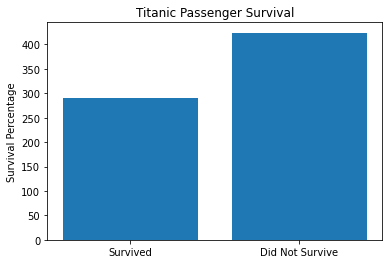

In [147]:
##Axis labels
survived_labels = ["Survived", "Did Not Survive"]
##People who survived vs people who did not
survived_vals = [len(titanic_df[titanic_df["Survived"] == 1]), len(titanic_df[titanic_df["Survived"] == 0])]

##Survided vs Did Not Survive bar chart
plt.bar(survived_labels, survived_vals)
plt.title("Titanic Passenger Survival")
plt.ylabel("Survival Percentage")
plt.show()

<AxesSubplot:>

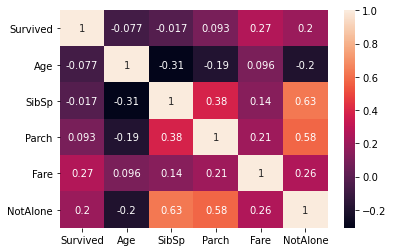

In [148]:
##Correlation heatmap

##Make my correlation matrix all floats (because it wasn't before for some reason)
titanic_df_corr_mat = titanic_df_corr_mat.astype(float)

##Actually create the heatmap
sns.heatmap(titanic_df_corr_mat, annot=True)

In [149]:
##Survival by title bar graph

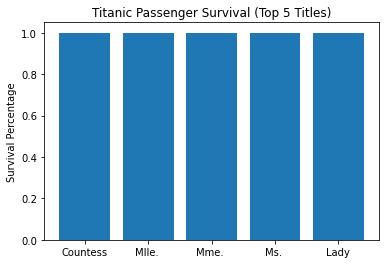

In [150]:
##Axis labels
survived_title_labels = ["Countess", "Mlle. ", "Mme. ", "Ms. ", "Lady"]
##People who survived vs people who did not
survived_title_vals = [1.0, 1.0, 1.0, 1.0, 1.0]

##Survided vs Did Not Survive (Top 5) bar chart
plt.bar(survived_title_labels, survived_title_vals)
plt.title("Titanic Passenger Survival (Top 5 Titles)")
plt.ylabel("Survival Percentage")
plt.show()

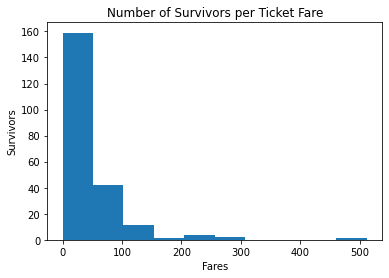

In [151]:
##Dictionary of who survived at each fare
survivor_fares = dict()
for index, rows in titanic_df.iterrows():
    fare = rows['Fare']
    if(not(fare in survivor_fares.keys())):
        for i, r in titanic_df.iterrows():
            survived = 0
            if(r["Survived"] == 1 and r["Fare"] == fare):
                survived += 1
        survivor_fares[fare] = survived
plt.hist(survivor_fares)
plt.xlabel("Fares")
plt.ylabel("Survivors")
plt.title("Number of Survivors per Ticket Fare")
plt.show()